# Analysis of Activation Functions
In this notebook I compare the performance of MLP using the Leaky ReLU and Sigmoid activation functions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lib import *

In [2]:
df = pd.read_csv('../scripts/results_summary.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4536 entries, ce2406bc88ceda4e2fde96bf96fdd2d5 to 9591fefef4086cbf060bc6afdcee4eba
Columns: 170 entries, activation_func to fail_rate
dtypes: bool(1), float64(164), int64(2), object(3)
memory usage: 5.9+ MB


## Extreme Values in Loss Metrics
Some configurations would occasionally have high loss, likely due to the ReLU configuration's loss exploding (this happened sometimes). Visually inspecting the data tells us that the main factor contribruting to this would be a learning rate of 0.1, as that is the only hyperparameter that is consistent amoung the cases where the loss exploded. This is clear with the maximum observed validation loss, where for models using a ReLU activation it is over 100 orders of magnitude larger than the maximum validation loss observed for models using the sigmoid activation - as shown in the table below:


|*Table: Maximum Observed Validation Loss by Model Activation Function*|
|-|

| Activation Function | Maximum Validation Loss |
|---------------------|-------------------------|
| ReLU                | 4.4136e+149             |
| Sigmoid             | 1.3816e+01              |

In [21]:
df[using_relu & using_iris][(df[using_relu & using_iris].filter(regex='val_loss_\d{2}') > 1e9).any(axis=1)]

,activation_func,batch_size,clf_type,dataset,gaussian_noise,learning_rate,momentum,shuffle_batches,train_loss_00,train_loss_01,...,val_loss_32,val_loss_33,val_loss_34,val_loss_35,val_loss_36,val_loss_37,val_loss_38,val_loss_39,fail_count,fail_rate
run_id,,,,,,,,,,,,,,,,,,,,,
c5eb49fa0f9d4ce25a0c145ed8a5a337,LeakyReLU,1,MLPRegressor,iris,0.00,0.1,0.0,True,3.015190e-01,3.205552e-01,...,1.747152e+01,7.051937e-01,2.735240e-01,1.403030e+00,4.494201e-01,3.872923e-01,NaN,NaN,15,0.375
e13df1a75ba0bec88043802b1317049f,LeakyReLU,1,MLPRegressor,iris,0.10,0.1,0.5,False,NaN,1.539870e-01,...,4.856845e-01,3.805133e-01,4.615491e-01,5.207973e-01,6.633487e-01,6.100308e-01,5.068657e-01,5.953395e-01,2,0.050
053ebc3ea2981661224576e41db1932d,LeakyReLU,8,MLPRegressor,iris,0.00,0.1,0.9,True,4.916806e-01,5.194493e-01,...,9.333884e+01,2.361729e+00,4.508204e+00,1.416188e-01,7.242192e-01,4.884008e+02,1.566494e-01,7.684679e-01,2,0.050
16caae5ffeca67e6c24cfefd39434739,LeakyReLU,8,MLPRegressor,iris,0.00,0.1,0.9,False,4.288734e-01,1.762439e+00,...,1.579959e+09,2.301403e+00,6.577916e-01,2.142356e+00,6.636788e-01,NaN,1.437374e+00,9.599773e+18,2,0.050
733892d6c136231a7ee0e7410152de94,LeakyReLU,8,MLPRegressor,iris,0.00,0.1,0.5,True,1.381553e-01,6.369974e-01,...,2.037849e-01,1.248446e-01,1.696057e-01,2.999975e-01,1.329677e-01,7.200321e+03,2.929143e-01,1.388593e-01,0,0.000
fd04834aaaef126fbd4fe67b405bf529,LeakyReLU,8,MLPRegressor,iris,0.00,0.1,0.5,False,1.166580e-01,4.392295e-01,...,8.941527e+01,1.480878e-01,2.764546e+14,1.628801e+00,4.282079e+00,1.925197e+00,1.086810e+02,1.544074e+00,2,0.050
8bc7305e675694eab29cf08a4ed18137,LeakyReLU,8,MLPRegressor,iris,0.00,0.1,0.0,False,5.332008e-01,2.696087e+00,...,3.319546e-01,8.949385e+00,6.170407e-01,1.931868e+41,5.033425e+92,3.883375e+00,3.179394e-01,2.223242e+00,0,0.000
d014d48b63a4a7b5c00dc6da68ee1a47,LeakyReLU,8,MLPRegressor,iris,0.10,0.1,0.9,True,3.240527e-01,3.828706e-01,...,1.717189e+02,6.699525e+02,4.155537e-01,1.768170e-01,8.408828e-01,6.337455e-01,1.596871e+92,2.635686e-01,1,0.025
0385f5695765ce77a8b1a5cebd0d2a72,LeakyReLU,8,MLPRegressor,iris,0.10,0.1,0.9,False,3.303943e-01,7.515662e+20,...,5.775318e-01,1.919407e+00,4.331217e-01,6.974672e-01,3.692972e-01,7.061482e-01,4.222487e-01,7.155004e-01,0,0.000


In [20]:
df[using_relu & using_iris][(df[using_relu & using_iris].filter(regex='val_loss_\d{2}') > 1e9).any(axis=1)].describe()

,batch_size,gaussian_noise,learning_rate,momentum,train_loss_00,train_loss_01,train_loss_02,train_loss_03,train_loss_04,train_loss_05,...,val_loss_32,val_loss_33,val_loss_34,val_loss_35,val_loss_36,val_loss_37,val_loss_38,val_loss_39,fail_count,fail_rate
count,78.000000,78.000000,7.800000e+01,78.000000,7.300000e+01,7.800000e+01,7.700000e+01,7.300000e+01,7.600000e+01,7.600000e+01,...,7.700000e+01,7.700000e+01,7.400000e+01,7.700000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.500000e+01,78.000000,78.000000
mean,13.089744,0.037949,1.000000e-01,0.455128,3.048520e+123,8.551164e+126,1.668357e+144,6.603586e+144,2.398333e+111,1.335056e+74,...,1.093781e+146,5.044939e+89,9.144257e+88,4.097925e+134,3.826486e+140,1.239636e+129,3.189196e+129,7.172031e+141,1.358974,0.033974
std,11.859771,0.045623,4.190284e-17,0.370905,2.604657e+124,7.552183e+127,1.463977e+145,5.642106e+145,2.090818e+112,1.163872e+75,...,9.597890e+146,4.422931e+90,7.689985e+89,3.595914e+135,3.291667e+141,1.066376e+130,2.743450e+130,6.211161e+142,2.772660,0.069317
min,-1.000000,0.000000,1.000000e-01,0.000000,1.010895e-01,1.094438e-01,9.387092e-02,1.104296e-01,9.749550e-02,1.204758e-01,...,7.926367e-02,1.248446e-01,1.347569e-01,9.711629e-02,6.480701e-02,1.108998e-01,1.211402e-01,1.051308e-01,0.000000,0.000000
25%,2.000000,0.000000,1.000000e-01,0.000000,1.608497e-01,2.598221e-01,1.525504e-01,1.971073e-01,2.239845e-01,2.207017e-01,...,2.007005e-01,2.005761e-01,2.367372e-01,2.162036e-01,2.581858e-01,2.645497e-01,1.984357e-01,2.719526e-01,0.000000,0.000000
50%,8.000000,0.010000,1.000000e-01,0.500000,3.240527e-01,4.518206e-01,3.469570e-01,3.251768e-01,3.276729e-01,3.626017e-01,...,5.667190e-01,6.508201e-01,6.374161e-01,5.207973e-01,4.170860e-01,4.763359e-01,4.214249e-01,4.360953e-01,0.000000,0.000000
75%,16.000000,0.100000,1.000000e-01,0.900000,9.659128e-01,8.639334e+02,1.394246e+02,1.017120e+00,1.001845e+00,6.456547e+00,...,6.561785e+01,8.949385e+00,3.959045e+01,1.209271e+01,1.776879e+01,5.014674e+01,2.999551e+01,4.795849e+00,2.000000,0.050000
max,32.000000,0.100000,1.000000e-01,0.900000,2.225420e+125,6.669908e+128,1.284635e+146,4.820618e+146,1.822733e+113,1.014640e+76,...,8.422115e+147,3.881150e+91,6.615518e+90,3.155402e+136,2.831599e+142,9.173309e+130,2.360005e+131,5.379024e+143,15.000000,0.375000


In [25]:
relu_max_loss = df[using_relu & using_iris].filter(regex='val_loss_\d{2}').max().max()
not_relu_max_loss = df[~using_relu & using_iris].filter(regex='val_loss_\d{2}').max().max()
print('Max loss with ReLU: %.4e \nMax loss with Sigmoid: %.4e' % (relu_max_loss, not_relu_max_loss))

Max loss with ReLU: 4.4136e+149 
Max loss with Sigmoid: 1.3816e+01


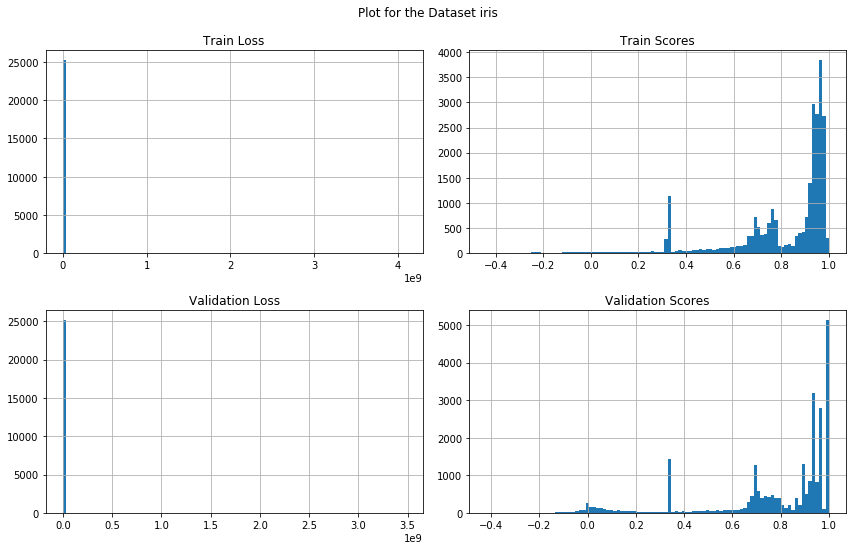

In [9]:
plot(df[using_relu & using_iris], thresholds=(2**32 - 1, -1, 2**32 - 1, -1))

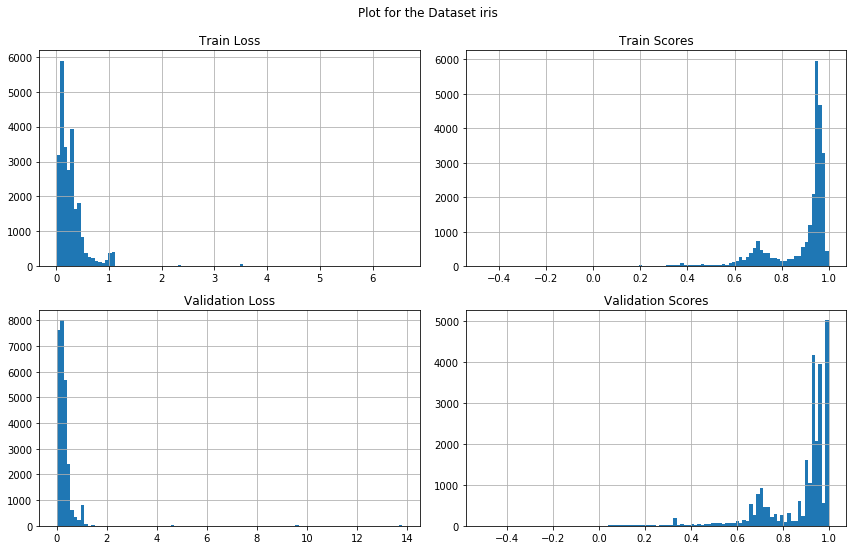

In [12]:
plot(df[~using_relu & using_iris], thresholds=(2**32 - 1, -1, 2**32 - 1, -1))

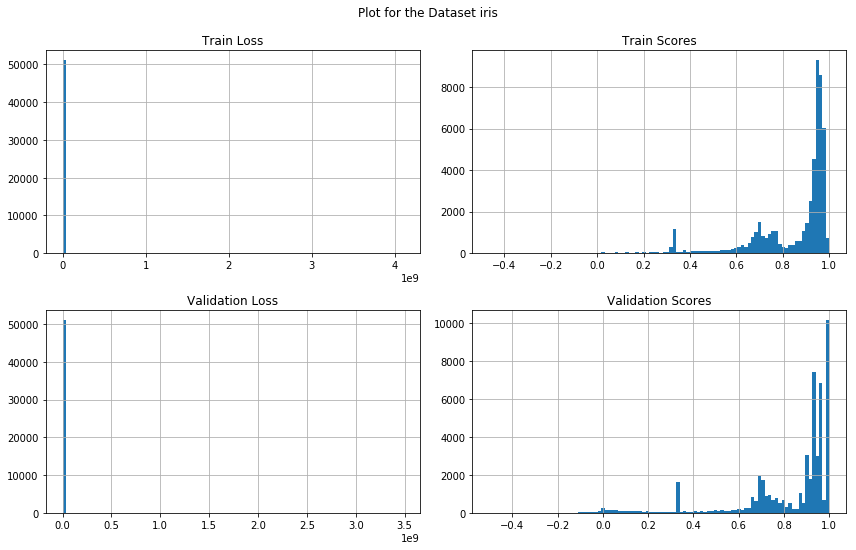

In [27]:
plot(df[using_iris], thresholds=(2**32 - 1, -1, 2**32 - 1, -1))

### Finding the Best Range of Loss to View
With some trial and error, the best range of loss values to view without losing too much information seem to be in the interval [0, 2].
Loss will be truncated to this interval from here on out.

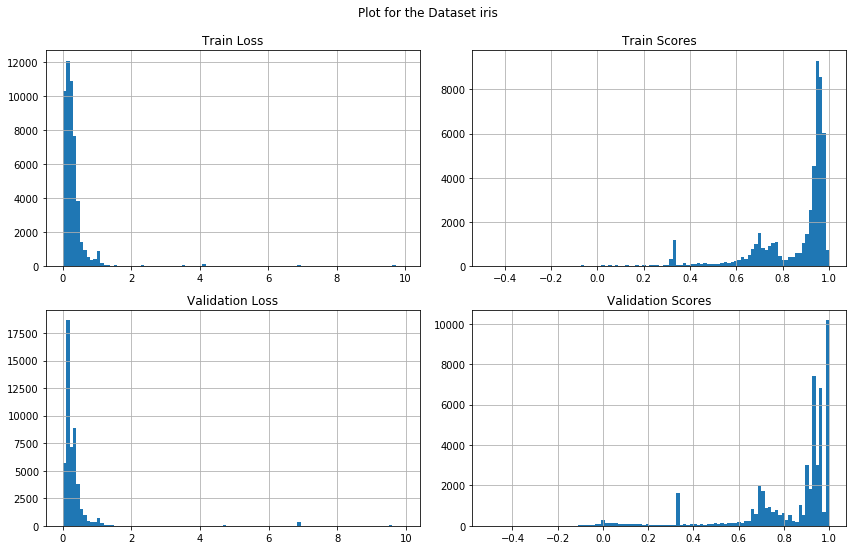

In [28]:
plot(df[using_iris], thresholds=(10, -1, 10, -1))

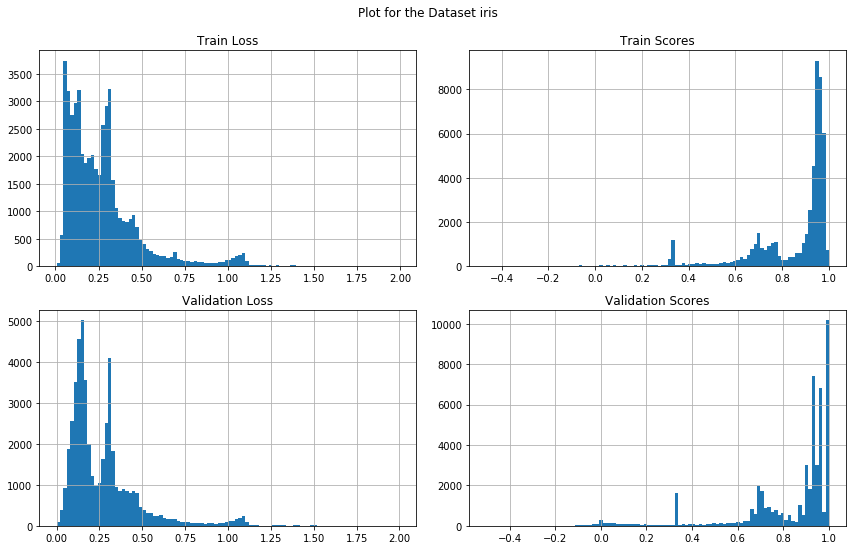

In [29]:
plot(df[using_iris], thresholds=(2, -1, 2, -1))

# Failure Rate
As observed in the notebook `Exploratory Data Analysis.ipynb`, there were a significant number of configurations that failed to converge. A model is considered to fail to converge if its score got stuck in the middle of its range. These values are 0.0 for regression tasks using Pearson's Correlation Coefficient or 0.5 RMSE loss - with the latter being more reliable; and 0.5 for accuracy in classification tasks.

Comparing the failure rate of all models by dataset, it is shown that the models trained on the Iris dataset are the most successful. Even though the boxplot would suggest that models trained on the encoder dataset are more successful, the small feature space makes me want to favour the models trained on the Iris dataset because I would believe these models to be more representative of artificial neural networks *in the wild* so to speak. 

Comparing the failure rate within the set of models trained on the Iris dataset reaffirms (although perhaps does not prove) the idea that the combination of the Leaky ReLU activation and a learning rate of 0.1 is correlated with poor model performance.

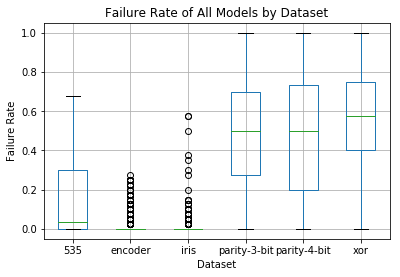

In [31]:
ax = df.boxplot(column='fail_rate', by='dataset')
ax.set_ylabel('Failure Rate')
ax.set_xlabel('Dataset')
ax.set_title('Failure Rate of All Models by Dataset')
plt.suptitle('');  # get rid of the generic title pandas gives us.

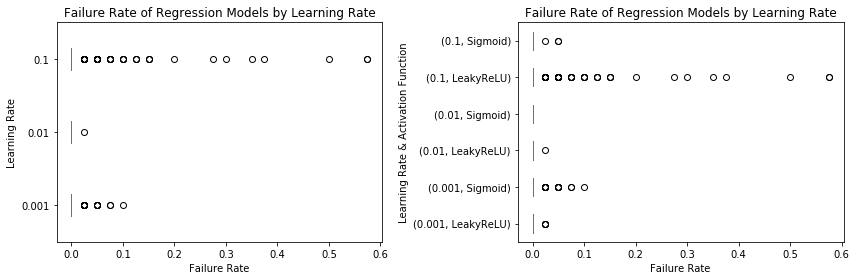

In [30]:
fig, axes = plt.subplots(1, 2, squeeze=True, figsize=(12, 4))

ax = df[using_iris].boxplot(column='fail_rate', by='learning_rate', 
                                  vert=False, grid=False, ax=axes[0])
ax.set_xlabel('Failure Rate')
ax.set_ylabel('Learning Rate')
ax.set_title('Failure Rate of Models Trained on the Iris Dataset by Learning Rate')

ax = df[using_iris].boxplot(column='fail_rate', by=['learning_rate', 'activation_func'], 
                                  vert=False, grid=False, ax=axes[1])
ax.set_xlabel('Failure Rate')
ax.set_ylabel('Learning Rate & Activation Function')
ax.set_title('Failure Rate of Models Trained on the Iris Dataset by Learning Rate and Activation Function')
plt.suptitle('');  # get rid of the generic title pandas gives us.
plt.tight_layout()

# The Best Configuration of Hyperparameters
So on to my main question: given seven hyperparameters and the settings that I tested, what is the best combination/configuration? I will try answering this question in the context of the Iris dataset (trying to answer that question in the context of all of the six datasets tested on would be very difficult and time consuming!). The seven 'hyperparameters' (albeit some are not strictly hyperparameters, but network architectures/design choices) are: 
- activation_func - the activation function used in the hidden layer
- batch_size - the number of samples used in a single training step
- clf_type - a setting that affects the activation function for the output layer and the loss and scoring functions used
- gaussian_noise - the amount of noise added to the inputs
- learning_rate - the learning constant $\eta$
- momentum - the momentum constant (often seen as $\alpha$)
- shuffle_batches - whether or not the dataset, and subsequently the generated (mini) batches, are shuffled at the start of each epoch.

I will look at each hyperparameter in isolation to see if there are any strong effects, and then try to see if there are any combinations of hyperparameters that are particulary performant.

# ReLU or Sigmoid?
The activation functions used in the hidden layer that I explored were the leaky ReLU ($\alpha=0.1$) and the sigmoid activation functions. The ReLU family of activation functions have some advantages over the sigmoid activation function, particularly in deep neural networks [1]. However, it would seem that the unbounded nature of the ReLU activation function ends up causing some cases of the models fail catastrophically, resulting in their  loss skyrocketing to infinity and beyond.

[1] Glorot, Xavier, Antoine Bordes, and Yoshua Bengio. "Deep sparse rectifier neural networks." In Proceedings of the fourteenth international conference on artificial intelligence and statistics, pp. 315-323. 2011.

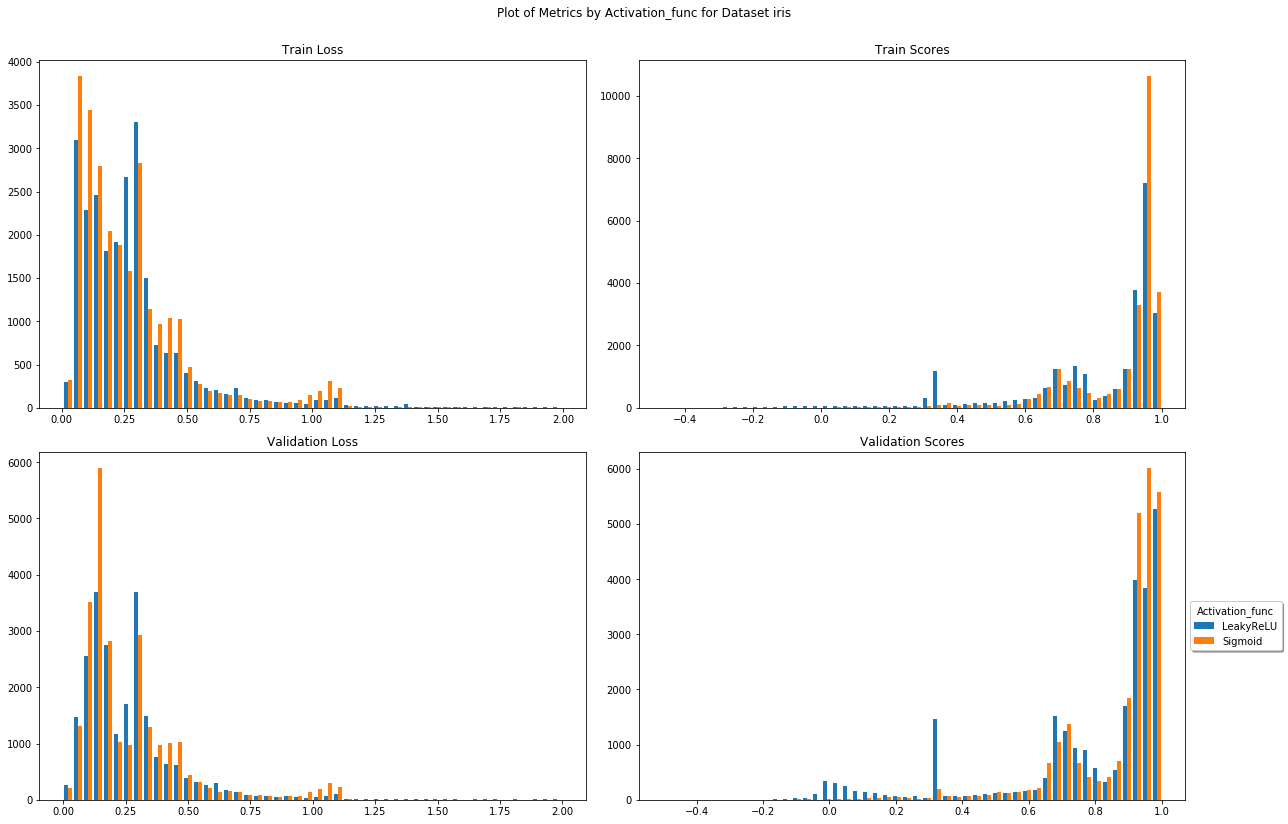

In [32]:
plot_hue(df[using_iris], hue='activation_func', thresholds=(2, -1, 2, -1))

It would seem that that the sigmoid activation function performs better. The graphs above would suggest that using a sigmoid activation function will result in lower loss and higher accuracy more often.

Now although the data is heavily skewed (and it is probably not even normally distributed), I will pretend that it is acceptable to apply Welch's t-test to the results of the models trained on the Iris datasets, with the groups of interest being the models trained with the sigmoid activation and those trained with the ReLU activation. The other hyperparameters are controlled for both groups. Unless otherwise stated, the null hypothesis is rejected when $p \leq .001$. The null hypothesis is that there is no difference between using ReLU or sigmoid activations.

The t-test on the loss metrics appear to not be statistically significant, so judging from the other statistics it would seem sigmoid is indeed better (i.e. lower loss) with an advantage at each quartile. Interestlingly though, we see that with ReLU activation a lower minimum training loss is observed.

It seems that sigmoid is provides a clear improvement in both training and validation scores with the t-test reporting strong effects with statistical significance (p < .001).

The t-test supports the claim that there is a higher failure rate when using ReLU activation (p < .001).

The results between regression and classification tasks (the distinction is important due to the different metrics used to measure model performance) mostly agree. However, the claim about higher failure rates with ReLU activation does not seem to hold in the context of classification tasks and in the classification tasks the difference in loss is considered statistically significant.

In [36]:
print('Key:')
print('a - Models using Sigmoid Activation')
print('b - Models using Leaky ReLU Activation')
print()

stat_test(df, using_iris, using_sigmoid, 'Comparison of Models Trained on the Iris Dataset by Activation function')

Key:
a - Models using Sigmoid Activation
b - Models using Leaky ReLU Activation

********************************************************************************
Comparison of Models Trained on the Iris Dataset by Activation function
********************************************************************************
##########
train_loss
##########
Summary for a:
n: 646
min: 9.9160e-03 - max: 6.5633e+00
μ ± 2σ: 2.9107e-01 ± 9.5632e-02
Quartiles - 1st: 1.1311e-01 - 2nd: 2.1542e-01 - 3rd: 3.5181e-01

Summary for b:
n: 600
min: 6.6351e-03 - max: 1.1206e+152
μ ± 2σ: 5.2117e+147 ± 1.4170e+150
Quartiles - 1st: 1.3502e-01 - 2nd: 2.6530e-01 - 3rd: 3.6884e-01

Welch t-test:
t: -1.1729 - p: .449
############
train_scores
############
Summary for a:
n: 646
min: -4.6578e-01 - max: 1.0000e+00
μ ± 2σ: 8.7744e-01 ± 1.5483e-02
Quartiles - 1st: 8.5090e-01 - 2nd: 9.4529e-01 - 3rd: 9.6094e-01

Summary for b:
n: 603
min: -4.3910e-01 - max: 1.0000e+00
μ ± 2σ: 8.0488e-01 ± 1.3630e-02
Quartiles - 1st: 7.1780e-0

In [38]:
stat_test(df, using_iris & using_regression, using_sigmoid, 'Comparison of Regresssion Models Trained on the Iris Dataset by Activation function')

********************************************************************************
Comparison of Regresssion Models Trained on the Iris Dataset by Activation function
********************************************************************************
##########
train_loss
##########
Summary for a:
n: 324
min: 2.8076e-02 - max: 5.9152e-01
μ ± 2σ: 2.0258e-01 ± 3.0320e-03
Quartiles - 1st: 1.1897e-01 - 2nd: 1.7491e-01 - 3rd: 2.9119e-01

Summary for b:
n: 285
min: 4.8504e-02 - max: 1.1206e+152
μ ± 2σ: 1.0445e+148 ± 2.0056e+150
Quartiles - 1st: 1.4903e-01 - 2nd: 2.7218e-01 - 3rd: 3.1900e-01

Welch t-test:
t: -1.1729 - p: .449
############
train_scores
############
Summary for a:
n: 324
min: -4.6578e-01 - max: 9.9615e-01
μ ± 2σ: 8.4565e-01 ± 2.0925e-02
Quartiles - 1st: 7.2141e-01 - 2nd: 9.4078e-01 - 3rd: 9.5258e-01

Summary for b:
n: 285
min: -4.3910e-01 - max: 9.8501e-01
μ ± 2σ: 7.3903e-01 ± 2.2270e-02
Quartiles - 1st: 6.7314e-01 - 2nd: 7.6661e-01 - 3rd: 9.3651e-01

Welch t-test:
t: 40.7728 - p: 

In [39]:
print('Key:')
print('a - Models using Sigmoid Activation')
print('b - Models using Leaky ReLU Activation')
print()

stat_test(df, using_iris & using_classification, using_sigmoid, 'Comparison of Classification Models Trained on the Iris Dataset by Activation function')

Key:
a - Models using Sigmoid Activation
b - Models using Leaky ReLU Activation

********************************************************************************
Comparison of Classification Models Trained on the Iris Dataset by Activation function
********************************************************************************
##########
train_loss
##########
Summary for a:
n: 322
min: 9.9160e-03 - max: 6.5633e+00
μ ± 2σ: 3.7958e-01 ± 1.3927e-01
Quartiles - 1st: 8.7528e-02 - 2nd: 2.9105e-01 - 3rd: 4.7254e-01

Summary for b:
n: 315
min: 6.6351e-03 - max: 1.9342e+01
μ ± 2σ: 7.3320e-01 ± 4.6859e-01
Quartiles - 1st: 8.5088e-02 - 2nd: 2.4892e-01 - 3rd: 4.9060e-01

Welch t-test:
t: -20.9569 - p: <.001
############
train_scores
############
Summary for a:
n: 322
min: 8.3333e-03 - max: 1.0000e+00
μ ± 2σ: 9.0923e-01 ± 1.7847e-02
Quartiles - 1st: 9.0781e-01 - 2nd: 9.5312e-01 - 3rd: 9.7500e-01

Summary for b:
n: 318
min: 0.0000e+00 - max: 1.0000e+00
μ ± 2σ: 8.6973e-01 ± 1.6605e-02
Quartiles - 1s